In [1]:
import utility.spectral as spectral
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

In [2]:
Beta=20
Nt=1024
TauGrid=np.linspace(1.0e-6, Beta-1.0e-6, Nt)

In [3]:
MaxFreq=100.0
Nw=256
FreqGrid=np.linspace(-MaxFreq, MaxFreq, Nw)

In [4]:
TauKer=spectral.TauKernel(Beta, TauGrid, FreqGrid, "Fermi")
ut, st, vt=linalg.svd(TauKer)

In [6]:
st[0:64]

array([1.74058277e+00, 1.74006374e+00, 1.12091865e+00, 1.11816193e+00,
       5.81535061e-01, 5.78865638e-01, 2.77269175e-01, 2.75460873e-01,
       1.25784221e-01, 1.24731565e-01, 5.48331403e-02, 5.42772931e-02,
       2.30903229e-02, 2.28173829e-02, 9.42607936e-03, 9.29961456e-03,
       3.74002176e-03, 3.68420249e-03, 1.44517633e-03, 1.42155178e-03,
       5.44694235e-04, 5.35060796e-04, 2.00504268e-04, 1.96705829e-04,
       7.21593592e-05, 7.07070581e-05, 2.54124981e-05, 2.48728472e-05,
       8.76433470e-06, 8.56909389e-06, 2.96205991e-06, 2.89318024e-06,
       9.81571353e-07, 9.57845034e-07, 3.19097010e-07, 3.11108578e-07,
       1.01810081e-07, 9.91786559e-08, 3.18932603e-08, 3.10445284e-08,
       9.81299612e-09, 9.54476668e-09, 2.96645304e-09, 2.88334032e-09,
       8.81314920e-10, 8.56051595e-10, 2.57391917e-10, 2.49855214e-10,
       7.39147005e-11, 7.17070450e-11, 2.08751204e-11, 2.02399406e-11,
       5.79938895e-12, 5.61980909e-12, 1.58497994e-12, 1.53508384e-12,
      

In [49]:
Nwn=1024
WnGrid=(np.array(range(-Nwn, Nwn))+0.5)*2.0*np.pi/Beta

In [50]:
WnKer=spectral.MatFreqKernel(Beta, WnGrid, FreqGrid, "Fermi")
uw, sw, vw=linalg.svd(WnKer)

In [53]:
st[0:64]/sw[:64]

array([1.86300113, 1.89688989, 1.91704585, 1.99404282, 1.87725112,
       1.96525579, 1.82927087, 1.9174877 , 1.78031336, 1.86758191,
       1.72833891, 1.81458244, 1.6731035 , 1.7580484 , 1.61507065,
       1.69829566, 1.55481656, 1.6358856 , 1.49288651, 1.5714201 ,
       1.42977253, 1.50547314, 1.36591735, 1.43857121, 1.30172182,
       1.37119038, 1.23755087, 1.30375866, 1.17373742, 1.23665948,
       1.11058469, 1.17023513, 1.04836746, 1.10478977, 0.98733284,
       1.04059202, 0.92770076, 0.97787721, 0.8696645 , 0.91684933,
       0.81339127, 0.85768286, 0.75902294, 0.80052447, 0.70667698,
       0.74549458, 0.65644736, 0.69268904, 0.6084066 , 0.64218095,
       0.56260333, 0.59401943, 0.51908112, 0.548247  , 0.47780447,
       0.50482782, 0.43893098, 0.46392398, 0.40203499, 0.42516665,
       0.36779685, 0.38902886, 0.33557303, 0.35591021])

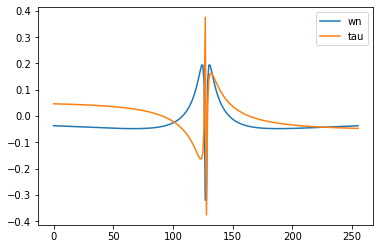

In [61]:
fig=plt.figure()
plt.plot(uw[:, 5].real, label="wn")
plt.plot(ut[:, 5].real, label="tau")
plt.legend()
plt.show()

In [29]:
WnGrid

array([-160.69246423, -160.37830497, -160.0641457 , ...,  160.0641457 ,
        160.37830497,  160.69246423])

In [30]:
vt.shape

(1024, 1024)

In [31]:
ut.shape

(256, 256)

In [47]:
a=np.dot(ut.T, uw)
a[0, :].real

array([-4.01224609e-11,  8.74741446e-01, -1.42413581e-11,  3.89650961e-01,
       -6.81231460e-12,  2.28271830e-01, -3.55071528e-12,  1.40182746e-01,
       -1.88436766e-12,  8.55005746e-02, -9.94681768e-13,  5.10927690e-02,
       -5.22545548e-13,  2.98798532e-02,  2.73103588e-13,  1.71289438e-02,
        1.41142306e-13,  9.64198852e-03,  7.28510134e-14,  5.33686903e-03,
        3.75912409e-14,  2.90772600e-03, -1.84051721e-14,  1.56074733e-03,
       -1.03221874e-14,  8.25888236e-04, -4.98698440e-15,  4.31090808e-04,
       -2.39107575e-15,  2.22069386e-04, -3.32972040e-15,  1.12945046e-04,
       -1.32137224e-15,  5.67372446e-05,  1.55702020e-15,  2.81603160e-05,
        1.25593366e-15, -1.38135453e-05, -7.18078830e-15, -6.69865858e-06,
        8.11174506e-15, -3.21211126e-06,  1.54078121e-14,  1.52337925e-06,
        3.32809601e-15,  7.14703156e-07,  2.32293621e-14,  3.31757619e-07,
       -9.41733303e-15,  1.52392482e-07, -3.82632996e-14,  6.92814316e-08,
       -2.67273929e-14,  